In [10]:
#importing required packages
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense

A naive Numpy implementation of the forward pass of the simple RNN.

In [ ]:

timesteps  = 100                                           #number of steps in an input sequence
input_features =32                                         #dimensionality of the input feature space
output_features =64                                        #dimensionality of output feature space
inputs = np.random.random((timesteps, input_features))     #random data for the sake of example
state_t = np.zeros((output_features,))                     #intialize state: an all zero vector
W = np.random.random((output_features, input_features))    #creating random weight matrices
U = np.random.random((output_features, output_features))   #creating random weight matrices
b = np.random.random((output_features,))                   #creating random weight matrices

successive_outputs = []
for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)  #STEP FUNCTION: Combines the input with the current state (the previous output) to obtain the current output
  successive_outputs.append(output_t)                             #stores this output in the list
  state_t = output_t                                              #updates the state of the network for the next time step

final_output_sequence = np.concatenate(successive_outputs, axis=0)#The final output is a 2D tensor of shape (timesteps, output_features)
  
                         

**A simple RNN cell**

![alt text](https://datascience-enthusiast.com/figures/rnn_step_forward.png)

Let's look at an example that uses simple RNN and returns only the output of the last step

In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32)) #returns output of the only last time step
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Following example returns full state sequence

In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences =True)) #returns output of full sequence
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Model representing several RNN stacked layers to increase the representational power of the network

In [ ]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32)) #Last layer only returns the last output
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_12 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_14 (SimpleRNN)    (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_15 (SimpleRNN)    (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Applying model on IMDB data set

In [11]:
max_features = 10000 #Number of words to consider as features
maxlen = 500 #Cuts off texts after this many words (among the max_features most common words)
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Let’s train a simple recurrent network using an Embedding layer and a SimpleRNN
layer

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 24s 1ms/step - loss: 0.5917 - acc: 0.6778 - val_loss: 0.4686 - val_acc: 0.7946
Epoch 2/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3637 - acc: 0.8485 - val_loss: 0.4057 - val_acc: 0.8290
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2819 - acc: 0.8894 - val_loss: 0.3189 - val_acc: 0.8678
Epoch 4/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.2422 - acc: 0.9080 - val_loss: 0.3335 - val_acc: 0.8740
Epoch 5/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1928 - acc: 0.9292 - val_loss: 0.5285 - val_acc: 0.8178
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1375 - acc: 0.9520 - val_loss: 0.3942 - val_acc: 0.8720
Epoch 7/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.1021 - acc: 0.9648 - val_loss: 0.4241 - val_acc:

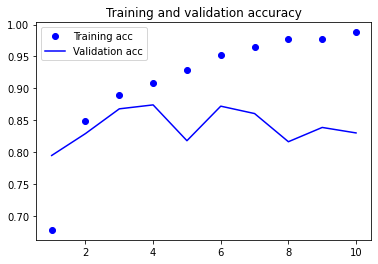

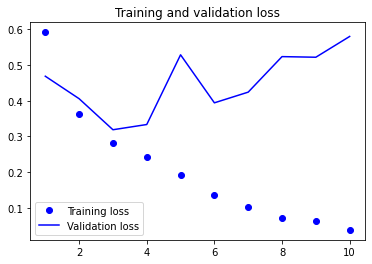

In [ ]:
#Plotting results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

We got a baseline of validation accuracy of 85% but this was only with Simple RNN layer which is not very effective on large text data due to **vanishing gradient problem**.There are some advance layers which can do the task much better such as LSTM and GRU layers

**LSTM MODEL** :Let’s add to this picture an additional data flow that carries information across timesteps. Call its values at different timesteps Ct, where C stands for carry.This information will have the following impact on the cell: it will be combined with the input
connection and the recurrent connection (via a dense transformation: a dot product
with a weight matrix followed by a bias add and the application of an activation function), and it will affect the state being sent to the next timestep (via an activation
function an a multiplication operation)
![alt text](https://miro.medium.com/max/1308/1*9IJ36auG0tP1Ba9Yw2kFJg.png)

**Concrete Example of LSTM on IMDB data**

In [12]:
#Using Keras LSTM layer for imdb data set
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
epochs=10,
batch_size=128,
validation_split=0.2)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 64s 3ms/step - loss: 0.5413 - acc: 0.7506 - val_loss: 0.3885 - val_acc: 0.8542
Epoch 2/10
20000/20000 [==============================] - 63s 3ms/step - loss: 0.3040 - acc: 0.8812 - val_loss: 0.3565 - val_acc: 0.8620
Epoch 3/10
20000/20000 [==============================] - 66s 3ms/step - loss: 0.2400 - acc: 0.9076 - val_loss: 0.2737 - val_acc: 0.8906
Epoch 4/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.2009 - acc: 0.9247 - val_loss: 0.2825 - val_acc: 0.8818
Epoch 5/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1734 - acc: 0.9378 - val_loss: 0.3879 - val_acc: 0.8586
Epoch 6/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1603 - acc: 0.9426 - val_loss: 0.5148 - val_acc: 0.8528
Epoch 7/10
20000/20000 [==============================] - 65s 3ms/step - loss: 0.1450 - acc: 0.9470 - val_loss: 0.3779 - val_acc:

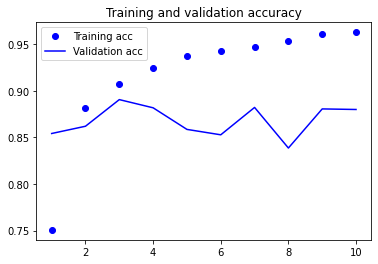

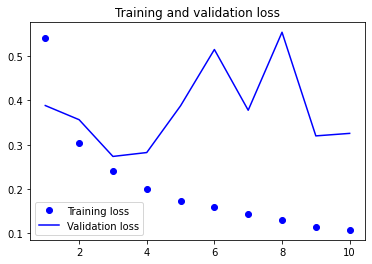

In [13]:
#Plotting results
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Achieved upto 88% of validation accuracy with LSTM with truncating data to only first 500 words